In [1]:
from PIL import Image, ImageFont, ImageDraw
from datetime import datetime

* Instagram size
    * square image
      * 1080px by 1080px
    * story
      * 1080px by 1920px

In [2]:
from PIL import Image


class ImageMani:
    def __init__(self, image_path, mode):
        self.image_path = image_path
        self.image = Image.open(image_path)
        self.original_width, self.original_height = self.image.size
        self.cropped_image = None
        self.mode = mode

    def crop_center_square(self, crop_width):
        center_x = self.original_width // 2
        center_y = self.original_height // 2

        half_crop_width = crop_width // 2
        left = center_x - half_crop_width
        top = center_y - half_crop_width
        right = left + crop_width
        bottom = top + crop_width

        self.cropped_image = self.image.crop((left, top, right, bottom))

        return self.cropped_image

    def crop_center_story(self, crop_width):
        original_aspect_ratio = self.original_width / self.original_height

        if original_aspect_ratio >= 9 / 16:
            crop_height = self.original_height
            crop_width = int(crop_height * 9 / 16)
        else:
            crop_width = self.original_width
            crop_height = int(crop_width * 16 / 9)

        center_x = self.original_width // 2
        center_y = self.original_height // 2

        left = center_x - crop_width // 2
        top = center_y - crop_height // 2
        right = left + crop_width
        bottom = top + crop_height

        self.cropped_image = self.image.crop((left, top, right, bottom))

        return self.cropped_image

    def resize_cropped_image(self):
        if self.mode == 'square':
            newsize = (1080, 1080)
            self.cropped_image = self.crop_center_square(self.original_width)
        elif self.mode == 'story':
            newsize = (1080, 1920)
            self.cropped_image = self.crop_center_story(self.original_width)

        self.cropped_image = self.cropped_image.resize(newsize)

    def add_text(self, text, font_size=40, text_color=(255, 255, 255), position=(100, 100), font_path=None):
        if self.cropped_image is None:
            raise ValueError(
                "Please crop and save the image before adding text.")

        draw = ImageDraw.Draw(self.cropped_image)

        if font_path is None:
            font = ImageFont.load_default()
        else:
            font = ImageFont.truetype(font_path, size=font_size)

        draw.text(position, text, font=font, fill=text_color)

    def place_image(self, image_path, resize=None, position=(0, 0)):
        if self.cropped_image is None:
            raise ValueError(
                "Please crop and save the image before placing another image.")

        image_to_place = Image.open(image_path).convert("RGBA")

        if resize is not None:
            image_to_place = image_to_place.resize(resize)

        x, y = position
        if x < 0:
            x = self.cropped_image.width - image_to_place.width + x
        if y < 0:
            y = self.cropped_image.height - image_to_place.height + y

        self.cropped_image.paste(image_to_place, (x, y), mask=image_to_place)

    def show_image(self):
        if self.cropped_image is not None:
            self.cropped_image.show()
        else:
            self.image.show()

    def save_imgae(self, output_path):
        if self.cropped_image is None:
            raise ValueError("No image data.")
        else:
            self.cropped_image.save(output_path)

In [26]:
jb_font_path = "./resource/font/JetBrainsMono-Regular.ttf"
ab_font_path = "./resource/font/ArialBlack.ttf"
fr_font_path = "./resource/font/futura medium bt.ttf"

output_image_path = "output.jpg"
current_datetime = datetime.now()
current_date = current_datetime.strftime("%d/%m/%Y")
date = f"{current_date}"

### Type 1

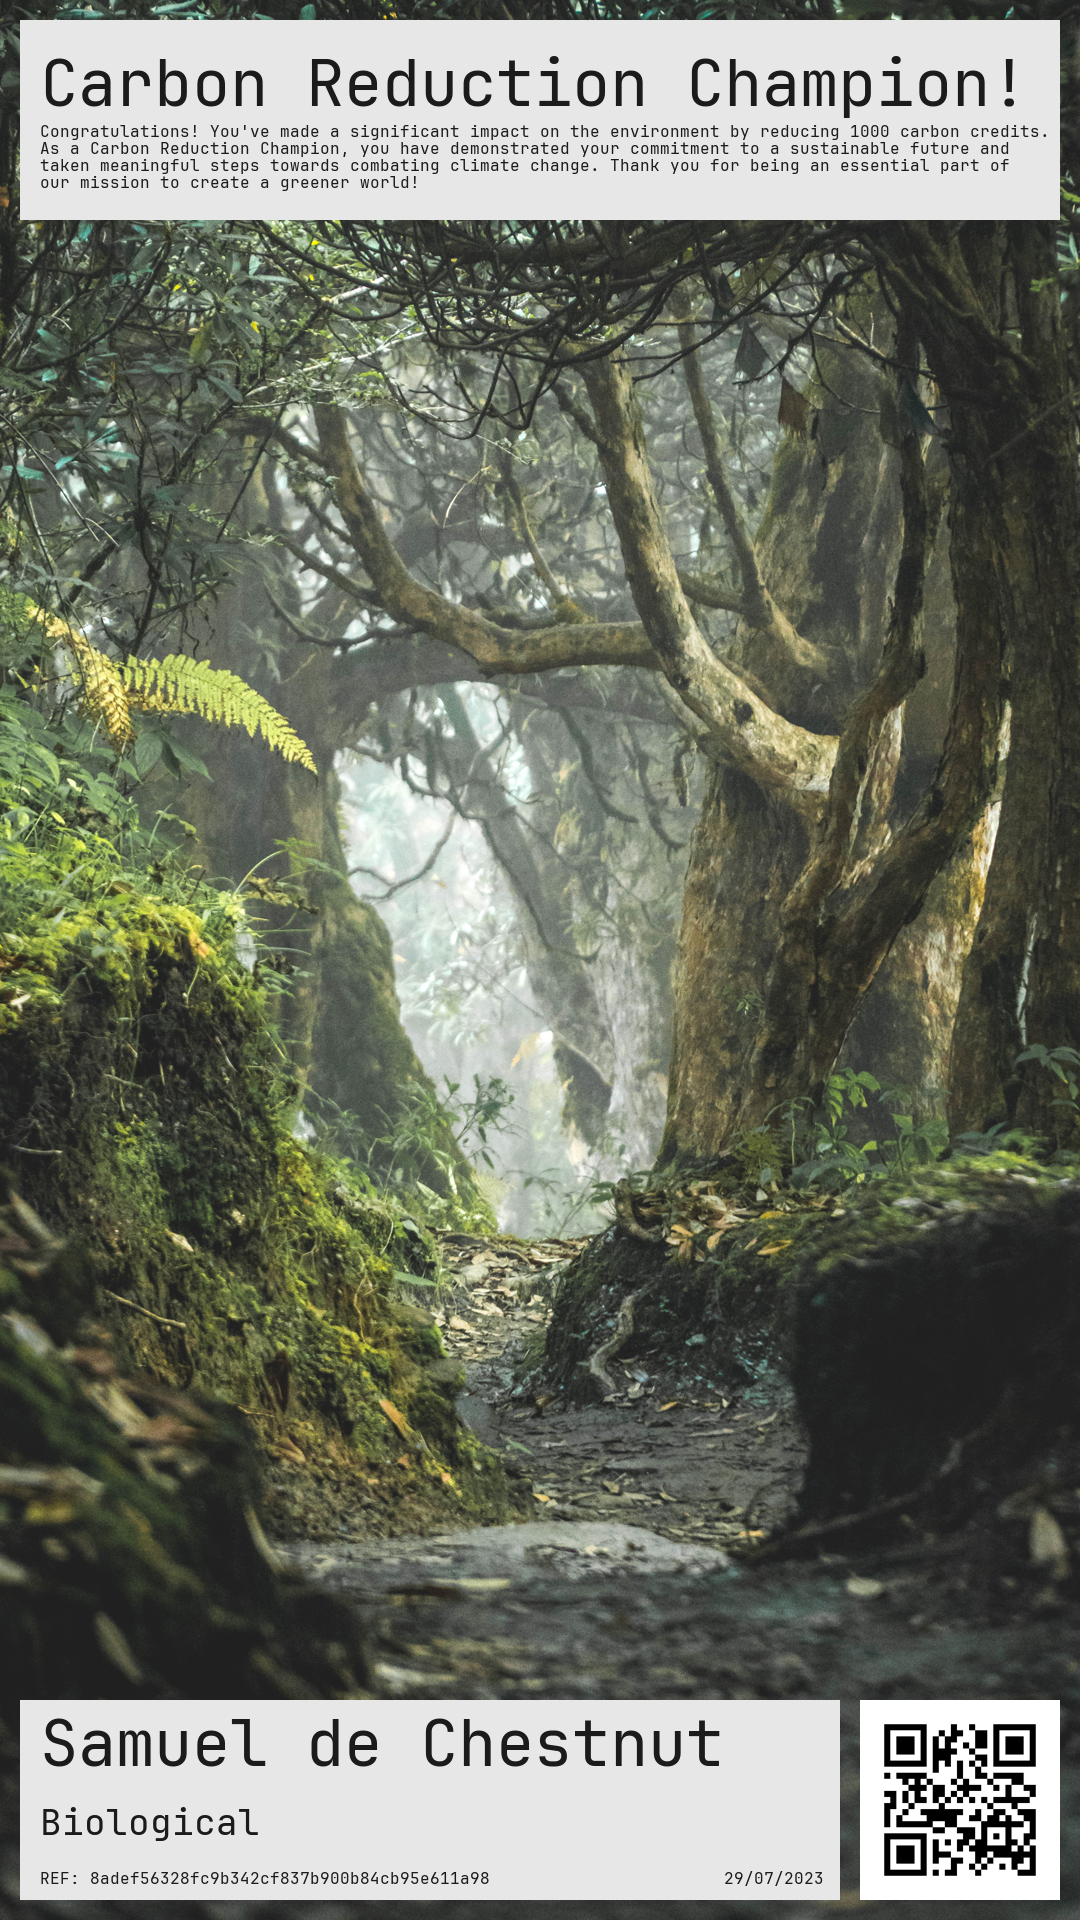

In [4]:
input_image_path = "./resource/101.jpg"  # you can use your own image.
image_to_place_path = "./resource/type1/element.png"
qrcode = "./resource/type1/MyQRCode1.png"
cropper = ImageMani(input_image_path, mode='story')
cropper.resize_cropped_image()

place_position = (0, 0)
cropper.place_image(image_to_place_path, position=place_position)

# Set title and description text
bagde_title = "Carbon Reduction Champion!"
# pillow doesn't have justify text 😔
desc1 = "Congratulations! You've made a significant impact on the environment by reducing 1000 carbon credits."
desc2 = "As a Carbon Reduction Champion, you have demonstrated your commitment to a sustainable future and"
desc3 = "taken meaningful steps towards combating climate change. Thank you for being an essential part of"
desc4 = "our mission to create a greener world!"
# Set buttom text
user_name_text = "Samuel de Chestnut"  # user full name
reward_type = "Biological"  # type of accomplishment

user_hash = "8adef56328fc9b342cf837b900b84cb95e611a98"  # badge hash or url
ref_text = "REF: " + user_hash

# Below here, if you want to change something, please contact me.
# start from here
text_color = (27, 27, 27)
# head
cropper.add_text(bagde_title, font_size=64, text_color=text_color,
                 position=(40, 40), font_path=jb_font_path)
# +17
cropper.add_text(desc1, font_size=16, text_color=text_color,
                 position=(40, 120), font_path=jb_font_path)
cropper.add_text(desc2, font_size=16, text_color=text_color,
                 position=(40, 137), font_path=jb_font_path)
cropper.add_text(desc3, font_size=16, text_color=text_color,
                 position=(40, 154), font_path=jb_font_path)
cropper.add_text(desc4, font_size=16, text_color=text_color,
                 position=(40, 171), font_path=jb_font_path)
# buttom
cropper.add_text(user_name_text, font_size=64, text_color=text_color,
                 position=(40, 1700), font_path=jb_font_path)
cropper.add_text(reward_type, font_size=36, text_color=text_color,
                 position=(40, 1798), font_path=jb_font_path)
cropper.add_text(ref_text, font_size=16, text_color=text_color,
                 position=(40, 1867), font_path=jb_font_path)
cropper.add_text(date, font_size=16, text_color=text_color,
                 position=(724, 1867), font_path=jb_font_path)
cropper.place_image(qrcode, resize=(200, 200), position=(860, 1700))
# stop

# Display the cropped image
cropper.show_image()
cropper.save_imgae(output_image_path)

### Type2

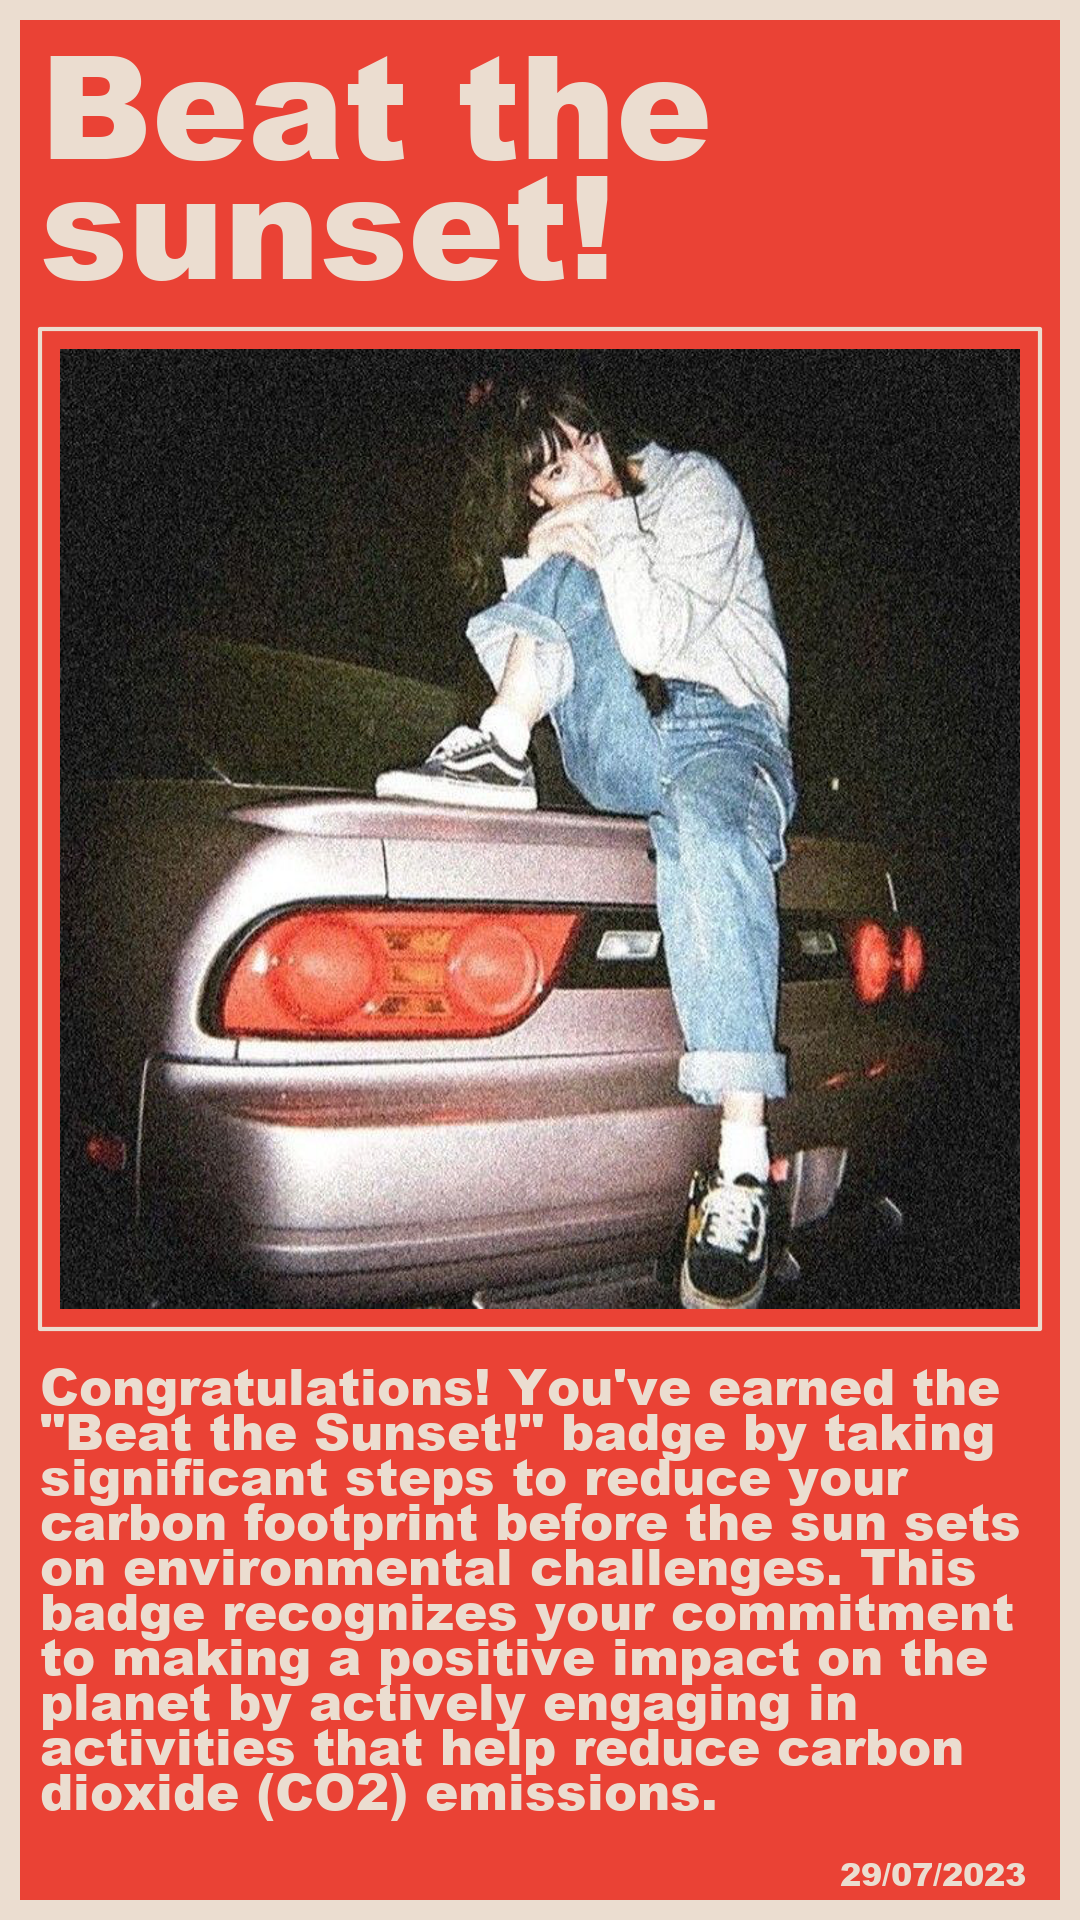

In [10]:
input_image_path = "./resource/type2/type2.jpg"
output_image_path = "output.jpg"
image_to_place_path = "./resource/type2/element.jpg"

cropper = ImageMani(input_image_path, mode='story')
cropper.resize_cropped_image()

place_position = (60, 349)
cropper.place_image(image_to_place_path, resize=(
    960, 960), position=place_position)

# Set title and description text
bagde_title1 = "Beat the"
bagde_title2 = "sunset!"
# pillow doesn't have justify text 😔
desc1 = "Congratulations! You've earned the"
desc2 = "\"Beat the Sunset!\" badge by taking"
desc3 = "significant steps to reduce your"
desc4 = "carbon footprint before the sun sets"
desc5 = "on environmental challenges. This"
desc6 = "badge recognizes your commitment"
desc7 = "to making a positive impact on the"
desc8 = "planet by actively engaging in"
desc9 = "activities that help reduce carbon"
desc10 = "dioxide (CO2) emissions."

# Below here, if you want to change something, please contact me.
# start from here
text_color = (235, 221, 208)
# head
cropper.add_text(bagde_title1, font_size=144, text_color=text_color,
                 position=(40, 0), font_path=ab_font_path)
cropper.add_text(bagde_title2, font_size=144, text_color=text_color,
                 position=(40, 120), font_path=ab_font_path)
# +45
cropper.add_text(desc1, font_size=50, text_color=text_color,
                 position=(40, 1349), font_path=ab_font_path)
cropper.add_text(desc2, font_size=50, text_color=text_color,
                 position=(40, 1394), font_path=ab_font_path)
cropper.add_text(desc3, font_size=50, text_color=text_color,
                 position=(40, 1439), font_path=ab_font_path)
cropper.add_text(desc4, font_size=50, text_color=text_color,
                 position=(40, 1484), font_path=ab_font_path)
cropper.add_text(desc5, font_size=50, text_color=text_color,
                 position=(40, 1529), font_path=ab_font_path)
cropper.add_text(desc6, font_size=50, text_color=text_color,
                 position=(40, 1574), font_path=ab_font_path)
cropper.add_text(desc7, font_size=50, text_color=text_color,
                 position=(40, 1619), font_path=ab_font_path)
cropper.add_text(desc8, font_size=50, text_color=text_color,
                 position=(40, 1664), font_path=ab_font_path)
cropper.add_text(desc9, font_size=50, text_color=text_color,
                 position=(40, 1709), font_path=ab_font_path)
cropper.add_text(desc10, font_size=50, text_color=text_color,
                 position=(40, 1754), font_path=ab_font_path)

cropper.add_text(date, font_size=32, text_color=text_color,
                 position=(840, 1850), font_path=ab_font_path)

cropper.show_image()
cropper.save_imgae(output_image_path)

### Type3

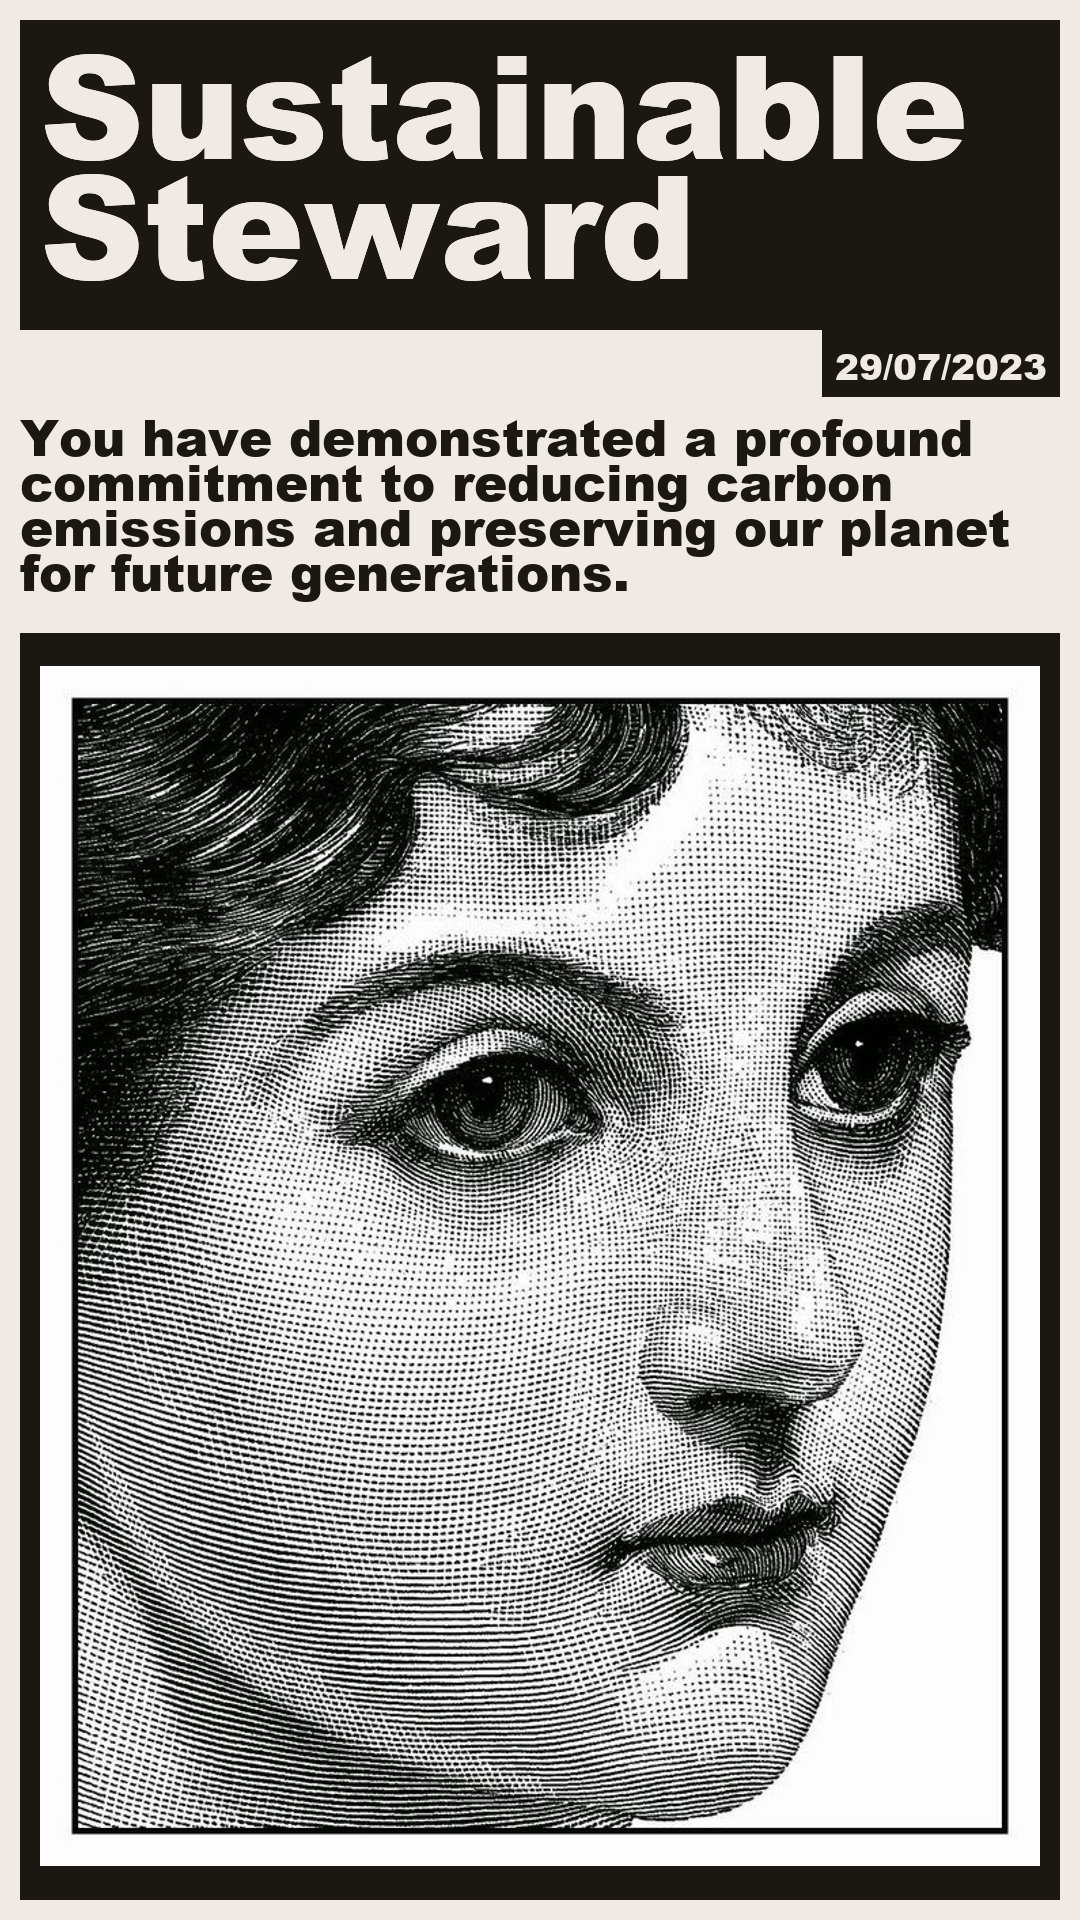

In [20]:
input_image_path = "./resource/type3/type3.jpg"
image_to_place_path = "./resource/type3/element.jpg"

cropper = ImageMani(input_image_path, mode='story')
cropper.resize_cropped_image()

place_position = (40, 666)
cropper.place_image(image_to_place_path, resize=(
    1000, 1200), position=place_position)

text_color = (241, 234, 228)
# Set title and description text
bagde_title1 = "Sustainable"
bagde_title2 = "Steward"
# pillow doesn't have justify text 😔
desc1 = "You have demonstrated a profound"
desc2 = "commitment to reducing carbon"
desc3 = "emissions and preserving our planet"
desc4 = "for future generations."

# head
cropper.add_text(bagde_title1, font_size=144, text_color=text_color,
                 position=(40, 0), font_path=ab_font_path)
cropper.add_text(bagde_title2, font_size=144, text_color=text_color,
                 position=(40, 120), font_path=ab_font_path)
# buttom
# +45
# head
cropper.add_text(bagde_title1, font_size=144, text_color=text_color,
                 position=(40, 0), font_path=ab_font_path)
cropper.add_text(bagde_title2, font_size=144, text_color=text_color,
                 position=(40, 120), font_path=ab_font_path)
# +45
text_color = (27, 24, 19)
cropper.add_text(desc1, font_size=50, text_color=text_color,
                 position=(20, 400), font_path=ab_font_path)
cropper.add_text(desc2, font_size=50, text_color=text_color,
                 position=(20, 445), font_path=ab_font_path)
cropper.add_text(desc3, font_size=50, text_color=text_color,
                 position=(20, 490), font_path=ab_font_path)
cropper.add_text(desc4, font_size=50, text_color=text_color,
                 position=(20, 535), font_path=ab_font_path)

cropper.add_text(date, font_size=36, text_color=text_color,
                 position=(835, 340), font_path=ab_font_path)

cropper.show_image()
cropper.save_imgae(output_image_path)

### Type4

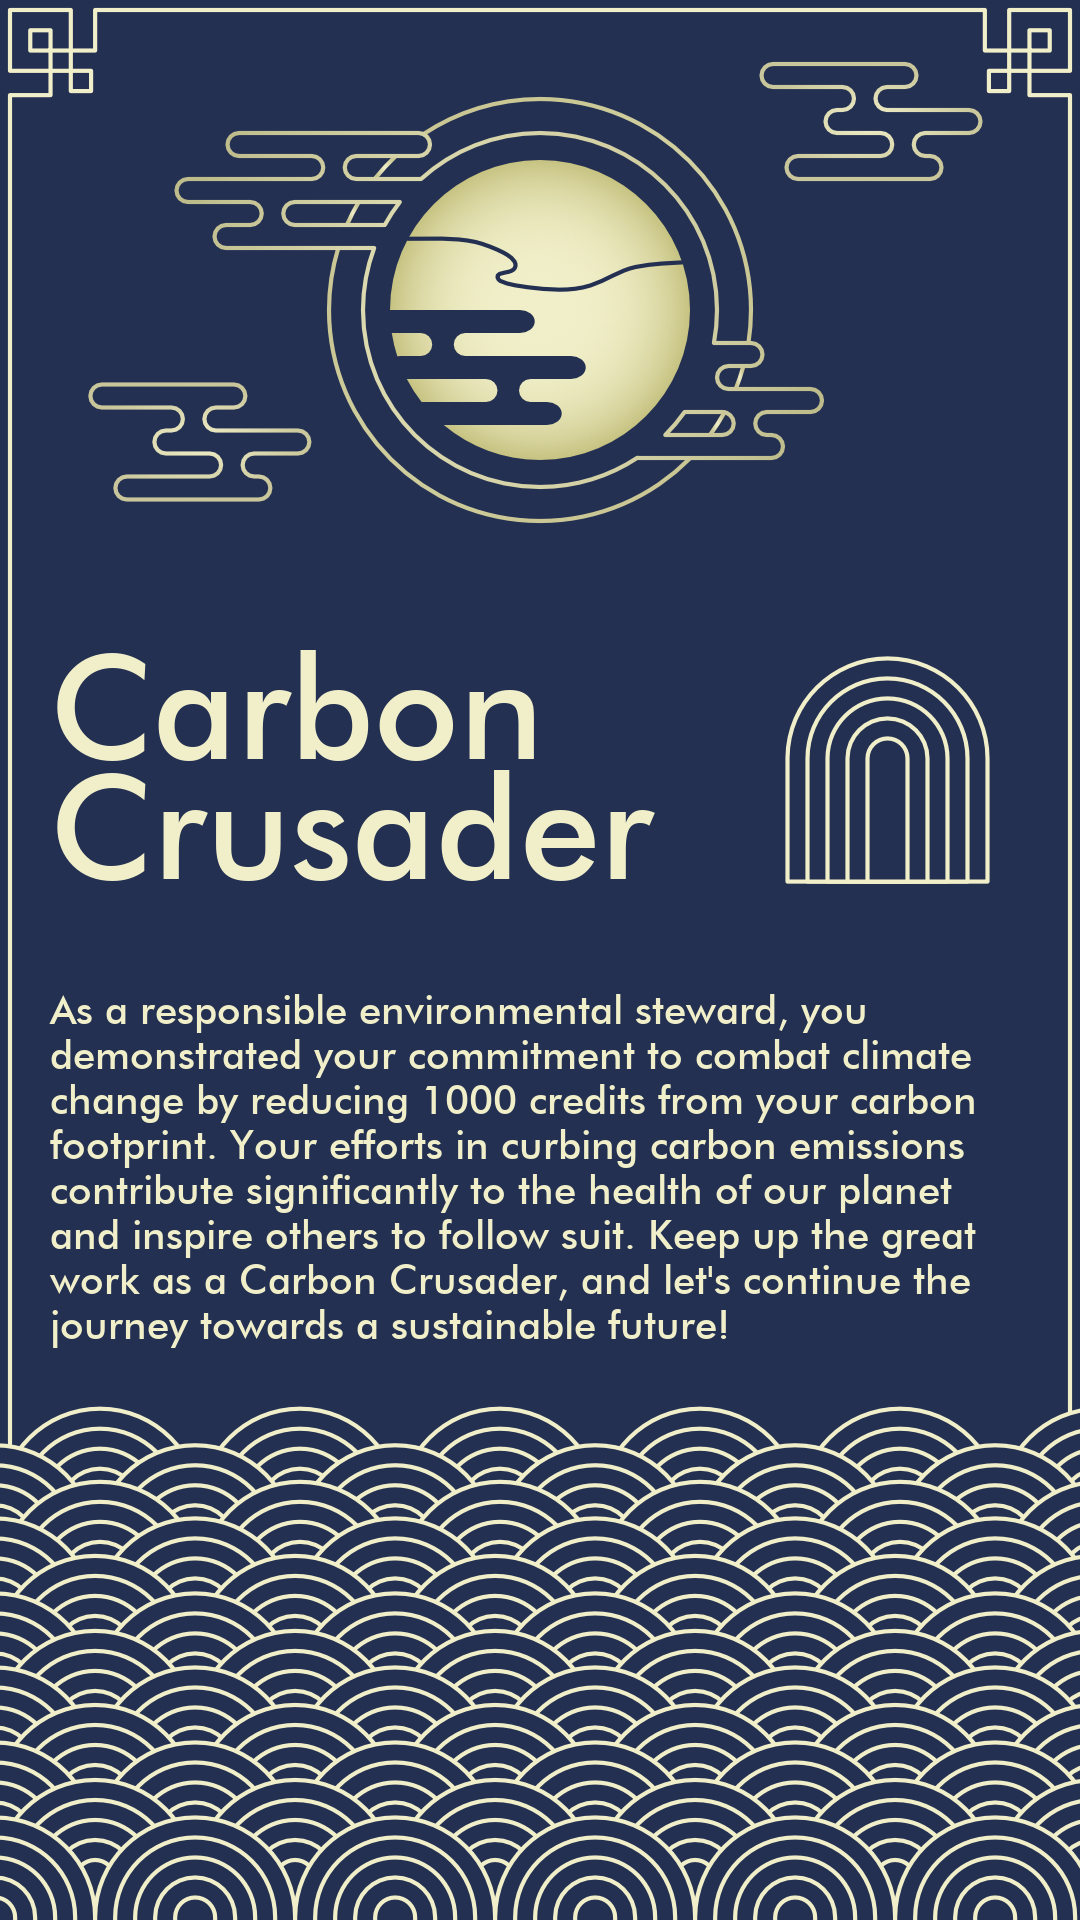

In [48]:
input_image_path = "./resource/type4/type4.jpg"
cropper = ImageMani(input_image_path, mode='story')
cropper.resize_cropped_image()

text_color = (240, 239, 201)
# Set title and description text
bagde_title1 = "Carbon"
bagde_title2 = "Crusader"
# pillow doesn't have justify text 😔
desc1 = "As a responsible environmental steward, you"
desc2 = "demonstrated your commitment to combat climate"
desc3 = "change by reducing 1000 credits from your carbon"
desc4 = "footprint. Your efforts in curbing carbon emissions"
desc5 = "contribute significantly to the health of our planet"
desc6 = "and inspire others to follow suit. Keep up the great"
desc7 = "work as a Carbon Crusader, and let's continue the"
desc8 = "journey towards a sustainable future!"
# head
cropper.add_text(bagde_title1, font_size=144, text_color=text_color,
                 position=(50, 620), font_path=fr_font_path)
cropper.add_text(bagde_title2, font_size=144, text_color=text_color,
                 position=(50, 740), font_path=fr_font_path)
# buttom
# +45
cropper.add_text(desc1, font_size=40, text_color=text_color,
                 position=(50, 985), font_path=fr_font_path)
cropper.add_text(desc2, font_size=40, text_color=text_color,
                 position=(50, 1030), font_path=fr_font_path)
cropper.add_text(desc3, font_size=40, text_color=text_color,
                 position=(50, 1075), font_path=fr_font_path)
cropper.add_text(desc4, font_size=40, text_color=text_color,
                 position=(50, 1120), font_path=fr_font_path)
cropper.add_text(desc5, font_size=40, text_color=text_color,
                 position=(50, 1165), font_path=fr_font_path)
cropper.add_text(desc6, font_size=40, text_color=text_color,
                 position=(50, 1210), font_path=fr_font_path)
cropper.add_text(desc7, font_size=40, text_color=text_color,
                 position=(50, 1255), font_path=fr_font_path)
cropper.add_text(desc8, font_size=40, text_color=text_color,
                 position=(50, 1300), font_path=fr_font_path)

cropper.show_image()
cropper.save_imgae(output_image_path)